# Homework 2: U.S. Boundary Currents

Name: Daniel Chukhlebov

Date: 9/2/2024

#### Overview
In class, we examined the general structure of ocean circulation on large scales and found that major ocean basins contain gyres - large circulation cells in the ocean. Further, we saw that vertical motion is driven by changes in density. In this homework, you will examine the structure of the ocean currents along the east and west coasts of the U.S and consider how these currents fit into the broader ocean circulation.

#### Import Modules
To begin, import the modules required to access data from netCDF files and make plots:

In [20]:
# import modules here
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature

### Part 1: Horizonal Velocity Structure
First, examine the mean velocity on the west and east coasts of the U.S. Begin by loading in both the `EVEL` and `NVEL` fields from the `EVEL_2015_12.nc` and `VVEL_2015_12.nc` files, respectively -- these fields represent the zonal (eastward-flowing) and meridional (westward-flowing) velocity in the model. 

In [21]:
# read in the EVEL and VVEL files to an xarray dataset
# note that these files must be in the same folder as this notebook
evel_ds = xr.open_dataset('EVEL_2015_12.nc')
nvel_ds = xr.open_dataset('NVEL_2015_12.nc')

In [22]:
# store the velocity components and longitude/latitude data
# into numpy arrays
evel = np.array(evel_ds['EVEL'])
nvel = np.array(nvel_ds['NVEL'])
lon = evel_ds['longitude'].values
lat = evel_ds['latitude'].values

Now that you have the data read in, make a plot of the eastward and northward velocity at the surface of the ocean. Be sure to add a title to each plot and some labels for the x and y axes.

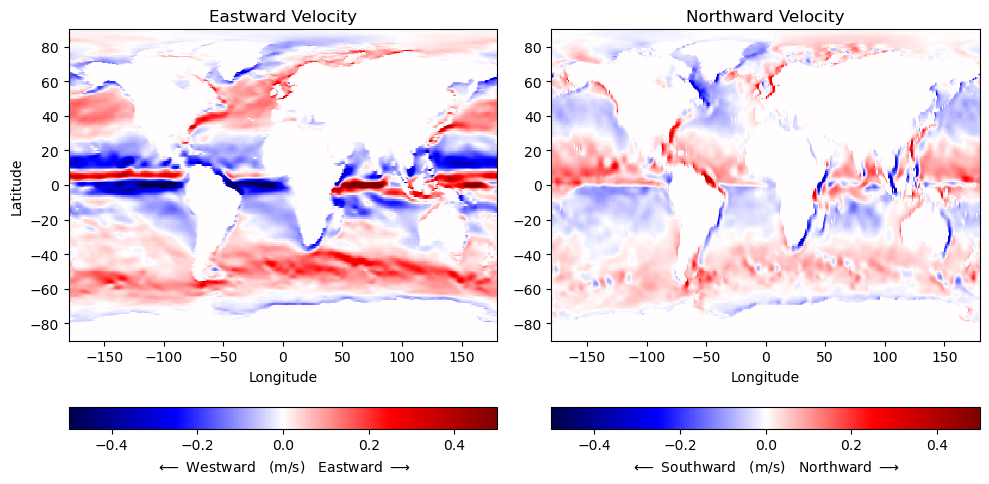

In [23]:
# make a plot of the velocity components (one for each)
# use a divergent colormap (such as seismic) to visualize the data
# for interpretation, it will likely be helpful to adjust the data
# bounds to be +/- 0.5 or even +/- 0.1

# make a figure
fig = plt.figure(figsize=(10, 5))

# Create a subplot for the eastward velocity at the surface
plt.subplot(1, 2, 1)
C = plt.pcolormesh(lon, lat, evel[0, 0, :, :], vmin=-0.5, vmax=0.5, cmap='seismic')  
plt.colorbar(C, orientation='horizontal',
             label='$\longleftarrow$ Westward   (m/s)   Eastward $\longrightarrow$')
plt.title('Eastward Velocity')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

# make a subplot for the northward velocity at the surface
plt.subplot(1, 2, 2)
C = plt.pcolormesh(lon, lat, nvel[0, 0, :, :], vmin=-0.5, vmax=0.5, cmap='seismic')  
plt.colorbar(C, orientation='horizontal',
             label='$\longleftarrow$ Southward   (m/s)   Northward $\longrightarrow$')
plt.title('Northward Velocity')
plt.xlabel('Longitude')

plt.tight_layout()  
plt.show()

### Questions:
1. What direction are the surface currents moving (roughly) at:
    - 30$^{\circ}$N on the east cost of the U.S.? the west coast?
    - 45$^{\circ}$N on the east cost of the U.S.? the west coast?
2. Which current flows faster? East coast or west coast?
2. Explain how these currents are part of the gyres in the North Atlantic and North Pacific.

1.
At 30 degrees North on both the the north and east coasts of the U.S., the surface currents are not experiencing significant movement. However, just above and below 30 degrees, the surface currents flow southeast and northwest, respectively, as a result of the gyre.

At 45 degrees North on the east and west coasts of the U.S., the surface currents are flowing southeast. However, along the Alaskan and more northern coastline, the currents move northwest.

2. The currents on the east coast flow faster than those on the west coast.

3. These currents are part of the Northern Atlantic and Pacific gyres. The warmer water from the tropics causes a strong northwestern current, while the colder water from the north causes a strong southeastern current. This circular displacement results in gyres.

### Part 2: Horizonal Temperature Structure
Next, examine the mean temperature on the coasts of the U.S. Load in the temperature field `THETA` from the `THETA_2015_12.nc` file. 

In [24]:
# read in the THETA file to an xarray dataset
# note that this file must be in the same folder as this notebook
ds_theta = xr.open_dataset('THETA_2015_12.nc')

In [25]:
# store the THETA grid into a into numpy array
theta = np.array(ds_theta['THETA'])
lon = ds_theta['longitude'].values
lat = ds_theta['latitude'].values
depth = ds_theta['Z'].values

Similar to your plot above, make a plot of the temperature at the surface of the ocean. 

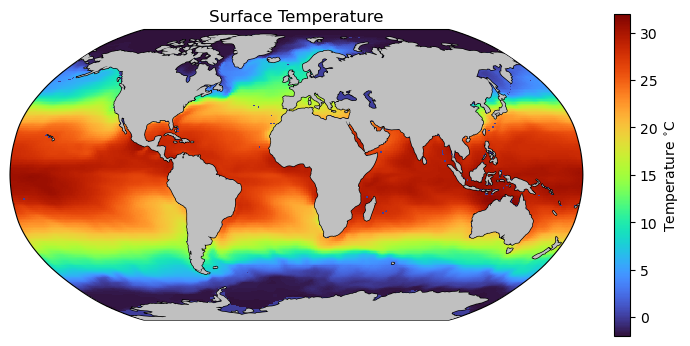

In [95]:
# make a plot of the temperature
# set the data bounds to -2 to 32 with a 
# sensible color map to visualize the data

# make a figure
fig = plt.figure(figsize=(8,5))

# plot the data
ax = plt.axes(projection=ccrs.Robinson())  # Use Robinson projection for a global view

# Plot the temperature data
C = plt.pcolormesh(lon, lat, theta[0, 0, :, :], transform=ccrs.PlateCarree(),
                   vmin=-2, vmax=32, cmap='turbo')
plt.colorbar(C, label='Temperature $^{\circ}$C', fraction=0.026)
ax.add_feature(cfeature.LAND, zorder=99, facecolor='silver')
ax.coastlines()

plt.title('Surface Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Questions:
1. How does the temperature on the west cost of the U.S. compare to the east coast at the same latitude?
2. How might ocean currents contribute to this temperature regime?

1. The temperature on the west coast of the U.S., compared to the same latitude on the east coast, is generally warmer at higher latitudes while colder at lower latitudes.
2. Ocean currents, depending on geographical features and direction, cause the flow of warm or cool currents. For example, on the west coast the current flows southward along the coast, bringing cooler water. On the east coast, the warmer water from the Gulf Stream is brought northward, causing higher temperatures.

### Part 3: Vertical Structure
Next, look at the vertical structure of ocean currents as well as temperature on the U.S coast. Being by loading in the vertical velocity field `WVELSTAR` from the `WVELSTAR_2015_12.nc` file. This variable estimates the speed at which water is moving in the vertical direction.

In [275]:
# read in the WVELSTAR file to an xarray dataset
# note that this file must be in the same folder as this notebook
wvelstar_ds = xr.open_dataset('WVELSTAR_2015_12.nc')

In [276]:
# store the WVELSTAR grid into a into numpy array
wvelstar = np.array(wvelstar_ds['WVELSTAR'])

Since we'll be plotting a vertical profile, we'll also need a depth variable. Read this variable into a numpy array in the same way you read in the data above.

In [277]:
# read in the depth variable to a numpy array
# Hint: Look at the metadata for the WVELSTAR
# What is the name of the depth variable?
depth = np.array(wvelstar_ds['Zl'])
theta_ds = xr.open_dataset('THETA_2015_12.nc')
theta = np.array(theta_ds['THETA'])
lat = theta_ds['latitude']

Next, create side-by-side plots of vertical velocity and temperature along the row corresponding to the latitude 40$^{\circ}$N i.e. index 259 along the latitude axis.

Text(0, 0.5, 'Depth')

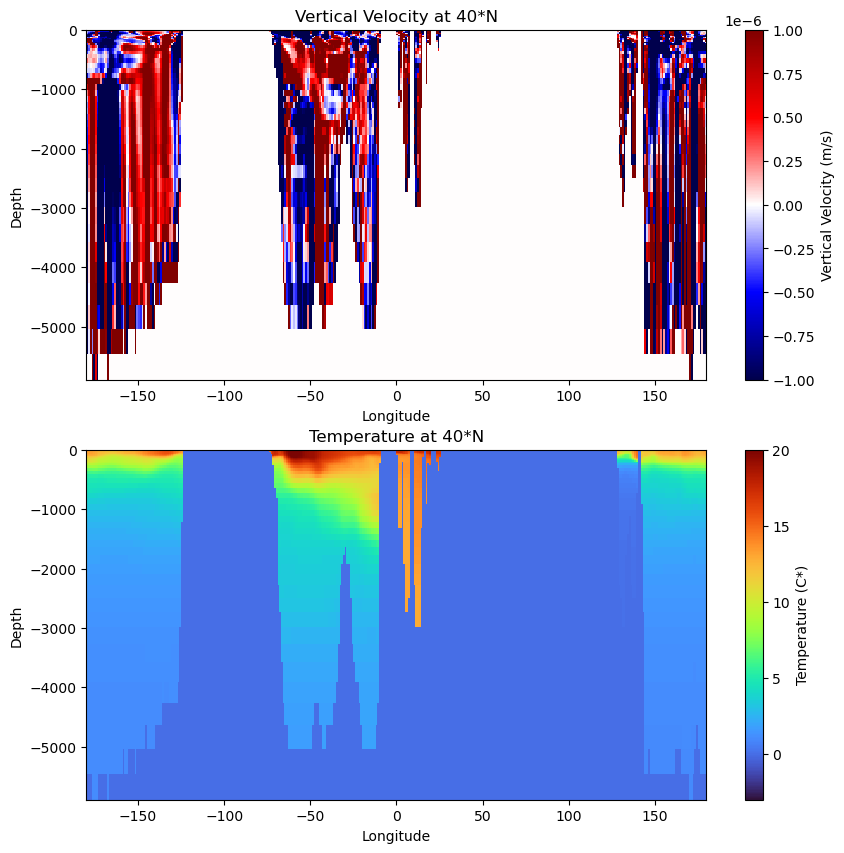

In [279]:
fig = plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
C = plt.pcolormesh(longitude, depth, wvelstar_at_lat, 
                    vmin=-0.000001, vmax=0.000001, cmap='seismic')
plt.colorbar(C, label='Vertical Velocity (m/s)')
plt.title('Vertical Velocity at 40*N')
plt.xlabel('Longitude')
plt.ylabel('Depth')

plt.subplot(2, 1, 2)
C1 = plt.pcolormesh(longitude, depth, theta_at_lat, 
                    vmin=-3, vmax=20, cmap='turbo')
plt.colorbar(C1, label='Temperature (C*)')
plt.title('Temperature at 40*N')
plt.xlabel('Longitude')
plt.ylabel('Depth')

### Questions:
1. How does the vertical velocity in the current on the west coast compare to that on the east?
2. How does the speed of vertical velocity compare to horizontal velocity? Why are they different? In other words, what are the forcing mechanisms associated with each?
3. How might the vertical currents adjacent to the coastline contribute to the differences in surface temperature?
4. Challenge question: On the west coast of the U.S., the prevailing winds tend to flow south in the spring time. How might these winds contribute to the vertical velocity identified in question 1?

1. Overall, the vertical velocity on the west coast is greater than that of the east coast.
2. Horizontal velocity is different from horizontal velocity because horizontal velocity results from the Coriolis effect and wind stress. Vertical velocity, on the other hand, is the result of smaller influences like water density resulting from salinity and temperature. Because of this, horizontal velocity is stronger than vertical velocity and plays a bigger role in ocean currents.
3. Vertical currents adjacent to a coastline can result in higher or lower temperatures. For example, upwelling will lead to colder temperatures because colder water from lower depths is forced upwards along coastlines. In more open ocean areas, this is less likely to occur, because vertical velocity will play a smaller role in the movement of ocean currents as opposed to horizontal velocity.
4. The south-blowing winds contribute to the vertical velocity of the west coast by cooling the water and keeping it moving. Because the warmer water is blown down or away from the coastline, colder water from deeper areas is allowed to rise. The colder temperature of the water results in cooler weather, higher percipitation, and potentially strong winds.